In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import customtkinter as cus

KHÁM PHÁ DỮ LIỆU

In [48]:
# Đọc dữ liệu từ các tệp CSV
train_file_path = 'train_dataset.csv'
test_file_path = 'test_dataset.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

train_data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,48.0,1.0,0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,2,1
1,55.0,1.0,2,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,1,0
2,54.0,0.0,2,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,1,0
3,54.0,1.0,2,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,2,0
4,57.0,0.0,0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,2,1


In [49]:
# Kiểm tra xem có giá trị NAN (giá trị thiếu)
train_data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

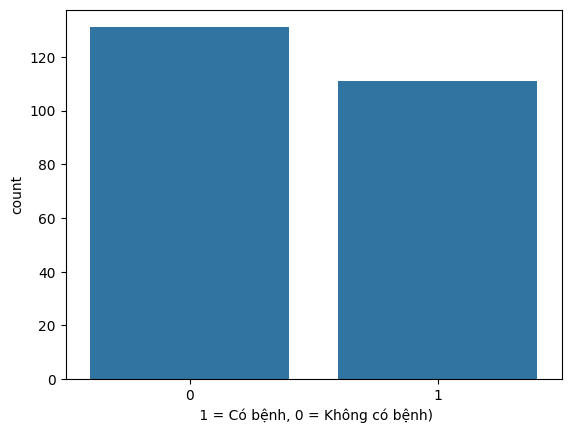

In [50]:
sns.countplot(x="AHD", data=train_data)
plt.xlabel(" 1 = Có bệnh, 0 = Không có bệnh)")
plt.show()

In [51]:
countNoDisease = len(train_data[train_data.AHD == 0])
countHaveDisease = len(train_data[train_data.AHD == 1])
print("Phần trăm bệnh nhân không có bệnh tim: {:.2f}%".format((countNoDisease / (len(train_data.AHD))*100)))
print("Phần trăm bệnh nhân có bệnh tim: {:.2f}%".format((countHaveDisease / (len(train_data.AHD))*100)))

Phần trăm bệnh nhân không có bệnh tim: 54.13%
Phần trăm bệnh nhân có bệnh tim: 45.87%


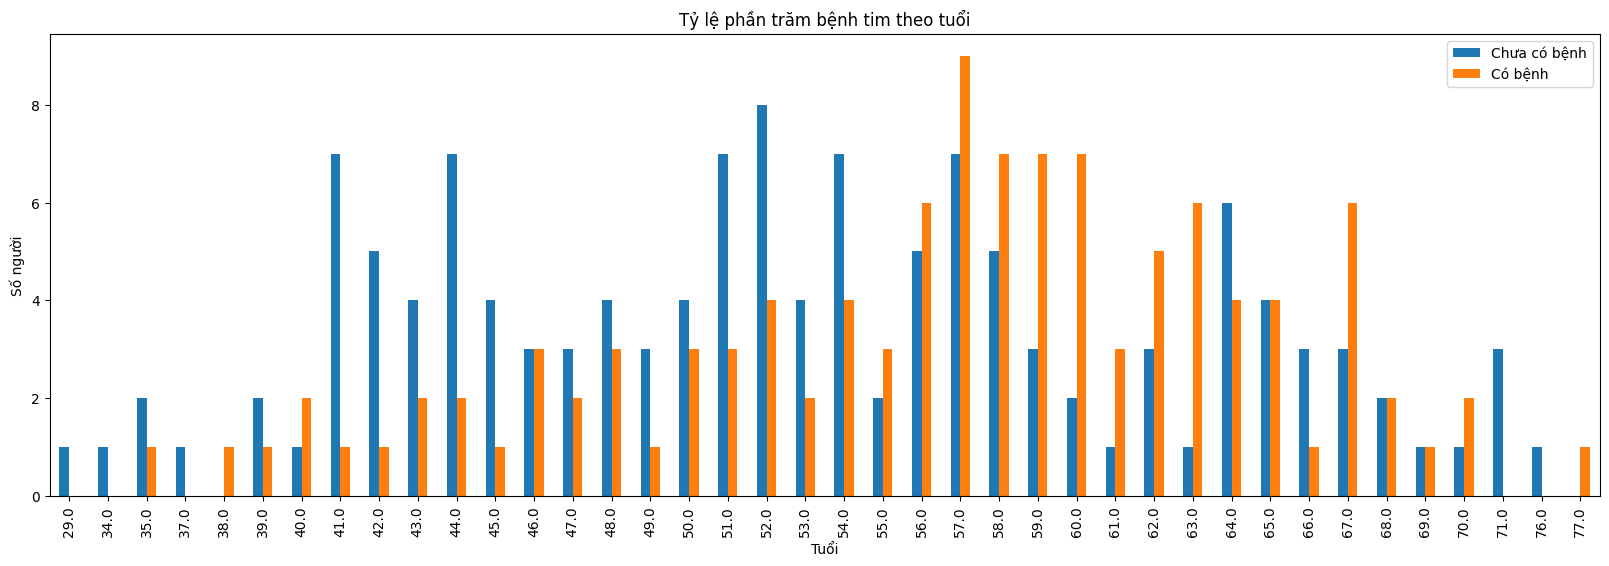

In [52]:
pd.crosstab(train_data.Age,train_data.AHD).plot(kind="bar",figsize=(20,6))
plt.title('Tỷ lệ phần trăm bệnh tim theo tuổi')
plt.xlabel('Tuổi')
plt.legend(["Chưa có bệnh", "Có bệnh"])
plt.ylabel('Số người')
plt.show()

AHD   0   1
Sex        
0.0  59  18
1.0  72  93


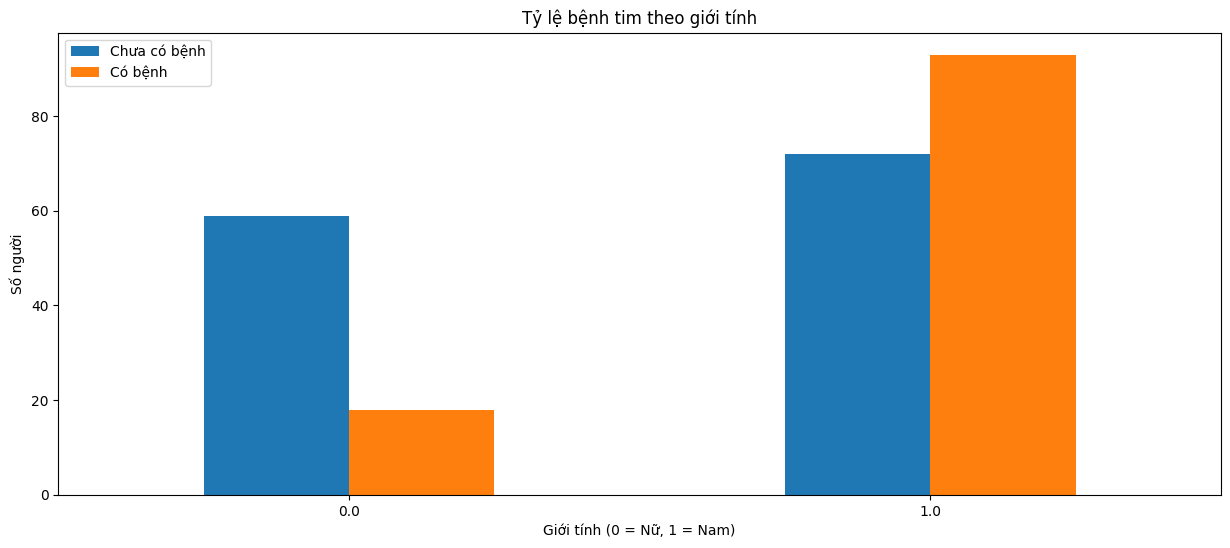

In [53]:
print(pd.crosstab(train_data.Sex,train_data.AHD))
pd.crosstab(train_data.Sex,train_data.AHD).plot(kind="bar",figsize=(15,6))
plt.title('Tỷ lệ bệnh tim theo giới tính')
plt.xlabel('Giới tính (0 = Nữ, 1 = Nam)')
plt.xticks(rotation=0)
plt.legend(["Chưa có bệnh", "Có bệnh"])
plt.ylabel('Số người')
plt.show()

AHD    0   1
Fbs         
0.0  114  93
1.0   17  18


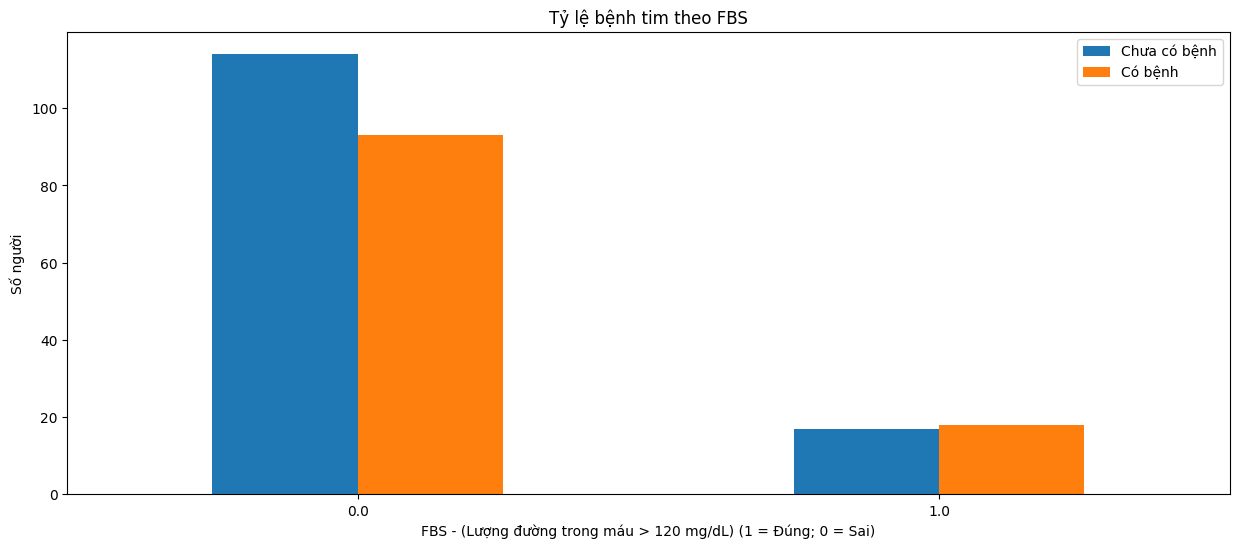

In [54]:
print(pd.crosstab(train_data.Fbs,train_data.AHD))
pd.crosstab(train_data.Fbs,train_data.AHD).plot(kind="bar",figsize=(15,6))
plt.title('Tỷ lệ bệnh tim theo FBS')
plt.xlabel('FBS - (Lượng đường trong máu > 120 mg/dL) (1 = Đúng; 0 = Sai)')
plt.xticks(rotation = 0)
plt.legend(["Chưa có bệnh", "Có bệnh"])
plt.ylabel('Số người')
plt.show()

AHD         0   1
Ca               
0.000000  107  40
0.672241    0   1
1.000000   17  36
2.000000    6  23
3.000000    1  11
 0 = Đau thắt ngực điển hình
 1 = Đau thắt ngực không điển hình
 2 = Không đau thắt ngực
 3 = Không có triệu chứng



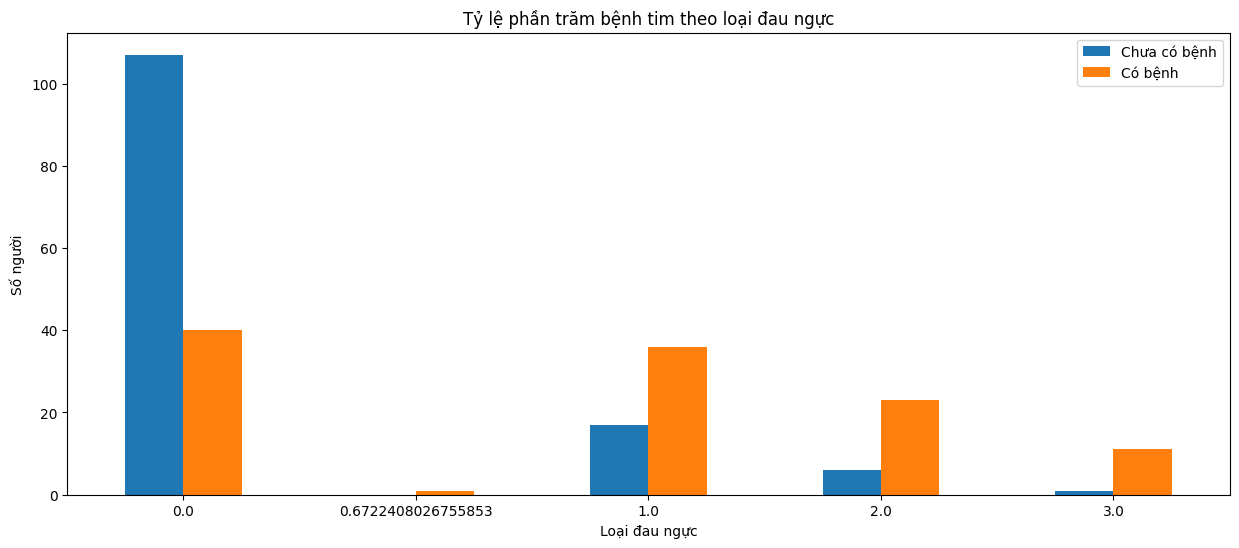

In [55]:
print(pd.crosstab(train_data.Ca,train_data.AHD))
pd.crosstab(train_data.Ca,train_data.AHD).plot(kind="bar",figsize=(15,6))
plt.title('Tỷ lệ phần trăm bệnh tim theo loại đau ngực')
plt.xlabel('Loại đau ngực')
print(" 0 = Đau thắt ngực điển hình\n","1 = Đau thắt ngực không điển hình\n","2 = Không đau thắt ngực\n","3 = Không có triệu chứng\n")
plt.xticks(rotation = 0)
plt.legend(["Chưa có bệnh", "Có bệnh"])
plt.ylabel('Số người')
plt.show()

In [56]:
X_train = train_data.drop('AHD', axis=1)
y_train = train_data['AHD']
X_test = test_data.drop('AHD', axis=1)
y_test = test_data['AHD']

### Xử lý dữ liệu sạch


In [57]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Huấn luyện LOGISTIC REGRESSION


KHÔNG DÙNG THƯ VIỆN

In [58]:
# Hàm kích hoạt Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm huấn luyện Logistic Regression bằng Gradient Descent
def logistic_regression(X, y, learning_rate=0.001, epochs=2000, tolerance=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0
    
    loss_list = []
    min_loss = float('inf')
    best_theta = theta
    best_bias = bias
    
    for epoch in range(epochs):
        z = np.dot(X, theta) + bias
        predictions = sigmoid(z)
        
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        loss_list.append(loss)
        
        if loss < min_loss:
            min_loss = loss
            best_theta = theta
            best_bias = bias

        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        
        theta -= learning_rate * dw
        bias -= learning_rate * db

        # Early stopping condition: gradient gần 0 hoặc loss không thay đổi
        if np.linalg.norm(dw) < tolerance and abs(db) < tolerance:
            print(f"Hội tụ tại epoch {epoch}")
            break

    return best_theta, best_bias, loss_list

# Hàm dự đoán
def predict(X, best_theta, best_bias):
    z = np.dot(X, best_theta) + best_bias
    predictions = sigmoid(z)
    return [1 if i >= 0.5 else 0 for i in predictions]

# Huấn luyện mô hình Logistic Regression
best_theta, best_bias, loss_list = logistic_regression(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_test_pred = predict(X_test_scaled, best_theta, best_bias)


In [59]:
# Đánh giá mô hình
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    cm = np.zeros((2, 2), dtype=int)
    for i in range(len(y_true)):
        cm[int(y_true[i])][int(y_pred[i])] += 1
    return cm

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    report = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    return report

In [60]:
print(f"Độ chính xác của thuật toán hồi quy logistic: {accuracy(y_test, y_test_pred) * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Độ chính xác của thuật toán hồi quy logistic: 91.80%

Confusion Matrix:
 [[29  4]
 [ 1 27]]

Classification Report:
 {'accuracy': np.float64(0.9180327868852459), 'precision': np.float64(0.8709677419354839), 'recall': np.float64(0.9642857142857143), 'f1': np.float64(0.9152542372881356)}


DÙNG THƯ VIỆN

In [61]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=6000, solver='lbfgs', C=0.01) 
log_model.fit(X_train_scaled, y_train)


LogisticRegression(C=0.01, max_iter=6000)

In [62]:
# Dự đoán trên tập kiểm tra
log_predictions = log_model.predict(X_test_scaled)

# Đánh giá mô hình
log_accuracy = accuracy_score(y_test, log_predictions)
log_cm = confusion_matrix(y_test, log_predictions)
log_report = classification_report(y_test, log_predictions)
log_acc = accuracy(y_test, y_test_pred)

print(f"Độ chính xác kiểm thử của thuật toán hồi quy logistic: {log_accuracy * 100:.2f}%")
print("Confusion Matrix:\n", log_cm)
print("\nClassification Report:\n", log_report)

Độ chính xác kiểm thử của thuật toán hồi quy logistic: 91.80%
Confusion Matrix:
 [[31  2]
 [ 3 25]]

Classification Report:
 {'accuracy': np.float64(0.9180327868852459), 'precision': np.float64(0.9259259259259259), 'recall': np.float64(0.8928571428571429), 'f1': np.float64(0.9090909090909091)}


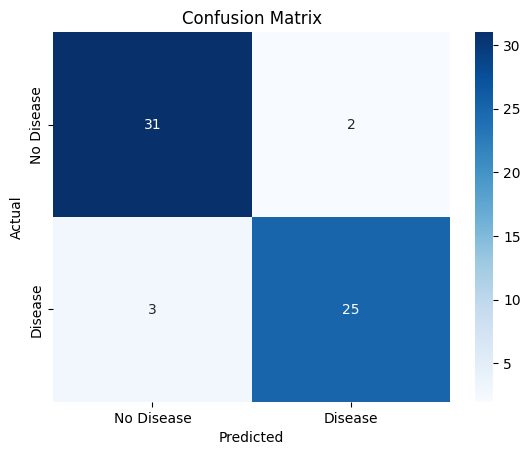

In [63]:
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
from sklearn.linear_model import Perceptron
pla = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
pla.fit(X_train_scaled, y_train)

pla_predictions = pla.predict(X_test_scaled)

pla_accuracy = accuracy_score(y_test, pla_predictions)
pla_cm = confusion_matrix(y_test, pla_predictions)
pla_report = classification_report(y_test, pla_predictions)

print(f"Độ chính xác kiểm thử của thuật toán PLA: {pla_accuracy * 100:.2f}%")
print("Confusion Matrix:\n", pla_cm)
print("\nClassification Report:\n", pla_report)

Độ chính xác kiểm thử của thuật toán PLA: 83.61%
Confusion Matrix:
 [[27  6]
 [ 4 24]]

Classification Report:
 {'accuracy': np.float64(0.8360655737704918), 'precision': np.float64(0.8), 'recall': np.float64(0.8571428571428571), 'f1': np.float64(0.8275862068965518)}


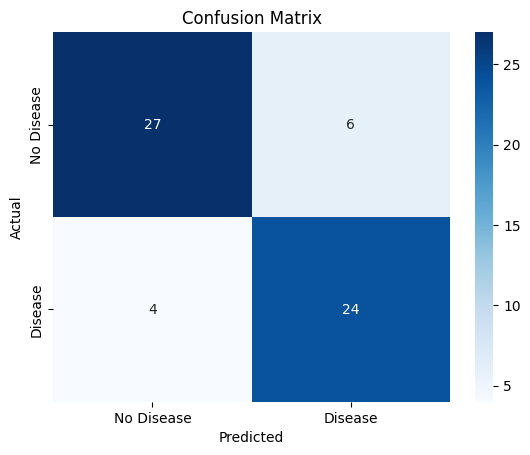

In [65]:
sns.heatmap(pla_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.tree import DecisionTreeClassifier
id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
id3.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
id3_predictions = id3.predict(X_test_scaled)
# Đánh giá mô hình
id3_accuracy = accuracy_score(y_test, id3_predictions)
id3_cm = confusion_matrix(y_test, id3_predictions)
id3_report = classification_report(y_test, id3_predictions)

y_pred = id3.predict(X_test)
print(f"Độ chính xác kiểm thử của thuật toán ID3: {id3_accuracy * 100:.2f}%")
print("\nClassification Report:\n", id3_report)

Độ chính xác kiểm thử của thuật toán ID3: 80.33%

Classification Report:
 {'accuracy': np.float64(0.8032786885245902), 'precision': np.float64(0.7352941176470589), 'recall': np.float64(0.8928571428571429), 'f1': np.float64(0.806451612903226)}


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


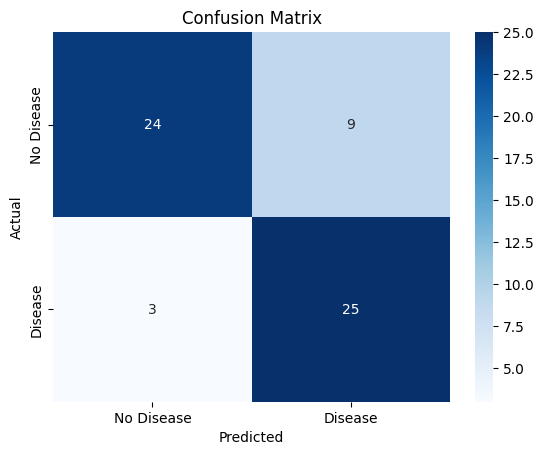

In [67]:
sns.heatmap(id3_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

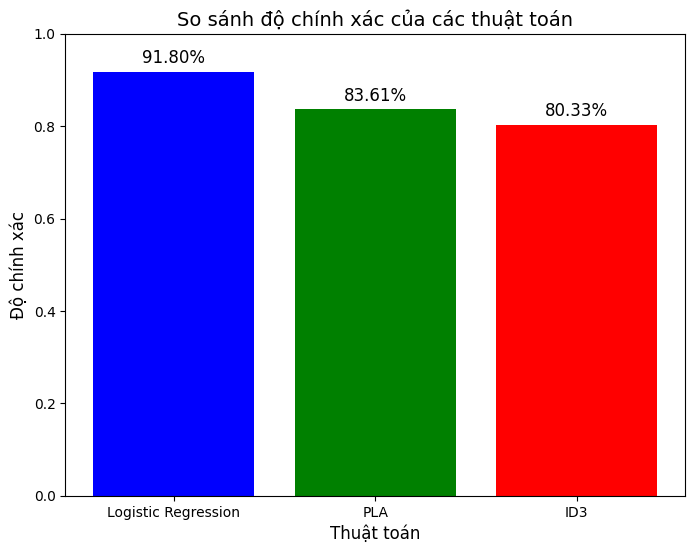

In [68]:
accuracies = [log_acc, pla_accuracy, id3_accuracy]
models = ['Logistic Regression', 'PLA', 'ID3']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('So sánh độ chính xác của các thuật toán', fontsize=14)
plt.xlabel('Thuật toán', fontsize=12)
plt.ylabel('Độ chính xác', fontsize=12)

for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]*100:.2f}%', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)
plt.show()


In [69]:
import tkinter as tk
from tkinter import filedialog, messagebox
# Giao diện người dùng
root = cus.CTk()
root.title("Phần mềm dự đoán bệnh tim")

width, height = 800, 600
x = (root.winfo_screenwidth() - width) // 2
y = (root.winfo_screenheight() - height) // 2
root.geometry(f"{width}x{height}+{x}+{y}")

# Tiêu đề ứng dụng
app_title = cus.CTkLabel(root, text="Phần mềm dự đoán bệnh tim", font=("Arial", 18, "bold"), text_color="blue")
app_title.pack(pady=10)

# Tính toán độ chính xác mô hình
accuracy_score_value = accuracy_score(y_test, y_test_pred)

# Đảm bảo accuracy_score_value là số thực
accuracy_score_value = float(accuracy_score_value)

# Hiển thị độ chính xác mô hình
info_label = cus.CTkLabel(
    root,
    text=f"Độ chính xác mô hình hồi quy logistic: {accuracy_score_value*100:.2f}%",
    font=("Arial", 14),
    justify="left",
)
info_label.pack(pady=20)

# Frame để chứa các ô nhập liệu
frame = cus.CTkFrame(root, border_width=2)
frame.pack(pady=20, padx=20)

# Lưu trữ các ô nhập liệu cho đặc trưng
values = {}
for i, col in enumerate(X_train.columns):
    label = cus.CTkLabel(frame, text=col, font=("Arial", 12))
    label.grid(row=i, column=0, padx=10, pady=5, sticky="w")
    entry = cus.CTkEntry(frame, width=200)
    entry.grid(row=i, column=1, padx=10, pady=5)
    values[col] = entry

# Hàm dự đoán
def predict():
    input_data = np.array([[float(values[col].get()) for col in X_train.columns]])
    prediction = log_model.predict(input_data)[0]
    result_text = "Có nguy cơ mắc bệnh" if prediction == 1 else "Không có nguy cơ mắc bệnh"
    result_label.configure(text=f"Kết quả dự đoán: {result_text}")

# Nút dự đoán và hiển thị kết quả
predictBtn = cus.CTkButton(frame, text="Dự đoán", command=predict)
predictBtn.grid(column=4, row=9, padx=10)

# Hiển thị kết quả dự đoán
result_label = cus.CTkLabel(frame, text="", font=("Time New Roman", 14, "bold"))
result_label.grid(column=4, row=10, pady=5, padx=5)

# Chạy ứng dụng
root.mainloop()
